 Importing necessary modules


In [4]:
import os, sys, time, warnings, glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm_notebook

Before any analysis, we decide to create validation dataset from the train data.

File path

In [34]:
# Set the parent folder
path = '/home/sysadm/Desktop/3ml/ZhangLabData/CellData/chest_xray'

In [35]:
# Collect all file paths for all classes
train_paths = glob.glob(os.path.join(path, 'train/*/*'))
val_paths = glob.glob(os.path.join(path, 'val/*/*'))
test_paths = glob.glob(os.path.join(path, 'test/*/*'))

In [36]:
y_train = [s.split('/')[-2] for s in train_paths]
y_val = [s.split('/')[-2] for s in val_paths]
y_test = [s.split('/')[-2] for s in test_paths]

In [37]:
df = pd.DataFrame({
    'Train':np.unique(y_train, return_counts=True)[1],
    'Validation':np.unique(y_val, return_counts=True)[1],
    'Test':np.unique(y_test, return_counts=True)[1]
}, index=['NORMAL', 'PNEUMONIA']) 
df

,Train,Validation,Test
NORMAL,1176,173,234
PNEUMONIA,3510,373,390


In [44]:
234+390

624

In [38]:
np.round((df/df.sum().sum())*100,2)

,Train,Validation,Test
NORMAL,20.08,2.95,4.00
PNEUMONIA,59.94,6.37,6.66


In [39]:
np.round(df/df.sum()*100, 2)

,Train,Validation,Test
NORMAL,25.1,31.68,37.5
PNEUMONIA,74.9,68.32,62.5


In [33]:
sns.barplot(np.round(df/df.sum()*100, 2))

/home/sysadm/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [8]:
print('Total number of image: {}'.format(df.sum().sum()))
print('Train set image ({}): {:.0f}%'.format(df.Train.sum(), (df.Train.sum()/df.sum().sum())*100))
print('Test set image ({}): {:.0f}%'.format(df.Test.sum(),(df.Test.sum()/df.sum().sum())*100))

Total number of image: 5842
Train set image (5218): 89%
Test set image (624): 11%


In [9]:
prop = df/df.sum().sum()
prop.round(decimals = 2)

,Train,Test
NORMAL,0.23,0.04
PNEUMONIA,0.66,0.07


In [10]:
df.Train/5233

NORMAL       0.256449
PNEUMONIA    0.740684
Name: Train, dtype: float64

In [11]:
train_df = pd.DataFrame({'path': train_img_path[0] + train_img_path[1],
                         'label': [classes[0] for i in range(len(train_img_path[0]))] + [classes[1] for i in range(len(train_img_path[1]))]})
test_df = pd.DataFrame({'path': test_img_path[0] + test_img_path[1],
                         'label': [classes[0] for i in range(len(test_img_path[0]))] + [classes[1] for i in range(len(test_img_path[1]))]})

In [12]:
heights = []
widths = []
full_path = train_dir + train_df.label + '/' + train_df.path
for img_path in tqdm_notebook(full_path, desc = 'Image reading to store height and weight'):
  if img_path.endswith('jpeg'):
    img = np.array(Image.open(img_path))
    heights.append(img.shape[0])
    widths.append(img.shape[1])

Image reading to store height and weight:   0%|          | 0/5218 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


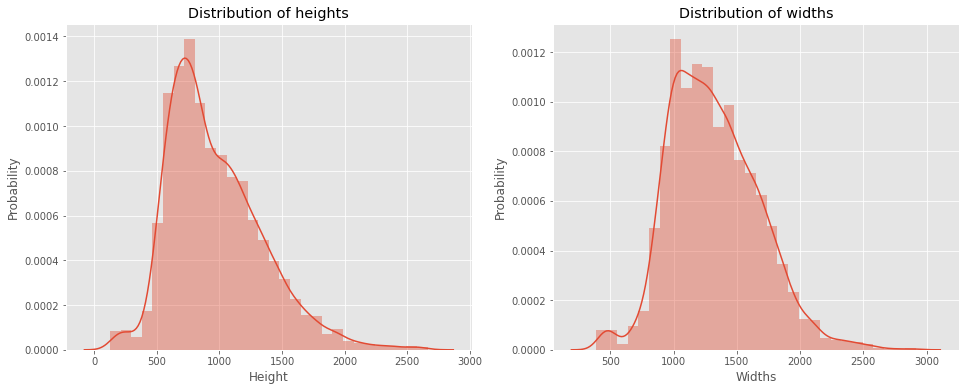

In [13]:
plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.distplot(heights, bins = 30); plt.xlabel('Height'); plt.ylabel('Probability'); plt.title('Distribution of heights')
plt.subplot(1,2,2)
sns.distplot(widths, bins = 30); plt.xlabel('Widths'); plt.ylabel('Probability'); plt.title('Distribution of widths');

In [13]:
# making validation dataset by choosing random sample from train folder with maintaing the probabilities for each class
train

In [17]:
train_df

,path,label
0,NORMAL2-IM-0408-0001.jpeg,NORMAL
1,IM-0270-0001.jpeg,NORMAL
2,IM-0520-0001.jpeg,NORMAL
3,NORMAL2-IM-0407-0001.jpeg,NORMAL
4,IM-0182-0001.jpeg,NORMAL
...,...,...
5213,person639_virus_1220.jpeg,PNEUMONIA
5214,person624_virus_1198.jpeg,PNEUMONIA
5215,person1219_bacteria_3172.jpeg,PNEUMONIA
5216,person1929_bacteria_4839.jpeg,PNEUMONIA


In [19]:
from sklearn.model_selection import train_test_split

In [21]:
train_df.loc[train_df.label == 'NORMAL']

,path,label
0,NORMAL2-IM-0408-0001.jpeg,NORMAL
1,IM-0270-0001.jpeg,NORMAL
2,IM-0520-0001.jpeg,NORMAL
3,NORMAL2-IM-0407-0001.jpeg,NORMAL
4,IM-0182-0001.jpeg,NORMAL
...,...,...
1337,NORMAL2-IM-0599-0001.jpeg,NORMAL
1338,NORMAL2-IM-0689-0001.jpeg,NORMAL
1339,NORMAL2-IM-0602-0001.jpeg,NORMAL
1340,NORMAL2-IM-1245-0001.jpeg,NORMAL


In [25]:
train_img_path[0]

2

In [27]:
for i in train_img_path:
  print(len(i))

1342
3876


In [29]:
1342*0.11*0.23

33.952600000000004

In [30]:
np.random.randint(40, )

17